<a href="https://colab.research.google.com/github/mounsifelatouch/OIBSIP/blob/master/Task5/SalesPredictionUsingPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oasis Infobyte Internship (15 October - 15 November, 2023)
## Data Science Internship
### <u>`Task 5`</u> : `SALES PREDICTION USING PYTHON`
#### `MOUNSIF EL ATOUCH`

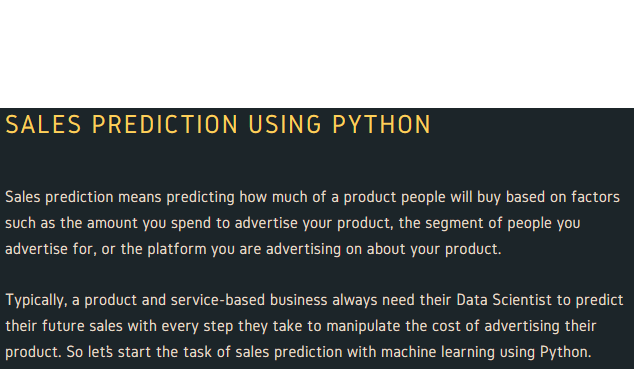

In [1]:
! pip install lazypredict

# `📦 Importing Dependencies`

In [2]:
# Needed packages
import pandas as pd                 # For data manipulation and analysis
import numpy as np                  # For numerical computations and handling arrays
import matplotlib.pyplot as plt     # For data visualization
import seaborn as sns               # For enhanced data visualization
from sklearn.model_selection import train_test_split      # For dataset splitting
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from tabulate import tabulate

from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")                         # Disable warnings
%matplotlib inline

# `⚒ Define Necessary Functions`

In [3]:
def Lazy(X, y, ratio=.8):
  offset = int(X.shape[0] * ratio)
  X_train, y_train = X[:offset], y[:offset]
  X_test, y_test = X[offset:], y[offset:]
  reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
  models, predictions = reg.fit(X_train, X_test, y_train, y_test)

  return models, predictions

# `🗂️ Dataset`

In [4]:
! wget https://raw.githubusercontent.com/mounsifelatouch/OIBSIP/master/Task5/Advertising.csv

--2023-10-29 14:33:14--  https://raw.githubusercontent.com/mounsifelatouch/OIBSIP/master/Task5/Advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5166 (5.0K) [text/plain]
Saving to: ‘Advertising.csv’

Advertising.csv     100%[===================>]   5.04K  --.-KB/s    in 0s      

2023-10-29 14:33:14 (50.6 MB/s) - ‘Advertising.csv’ saved [5166/5166]



In [5]:
# Load the dataset
data = pd.read_csv("/content/Advertising.csv")

In [6]:
# Disply the first few rows of the dataset
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.10,37.80,69.20,22.10
1,2,44.50,39.30,45.10,10.40
2,3,17.20,45.90,69.30,9.30
3,4,151.50,41.30,58.50,18.50
4,5,180.80,10.80,58.40,12.90


In [7]:
# Drop unnecessary columns
data = data.drop(['Unnamed: 0'], axis=1)

# Reset the index of the DataFrame
data.reset_index()

# Display the first few rows of the modified DataFrame
data.head()

,TV,Radio,Newspaper,Sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [8]:
# Check for duplicate
data.duplicated().sum()     # There are no duplicate items

0

# `📊 EDA (Exploratory Data Analysis)`


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<u>`Comments :`</u>
* The dataset comprises a total of `200 recods`;
* There are no missing values present in the dataset;
* All columns in the dataset are of continuous nature.

### `Univariate Analysis`

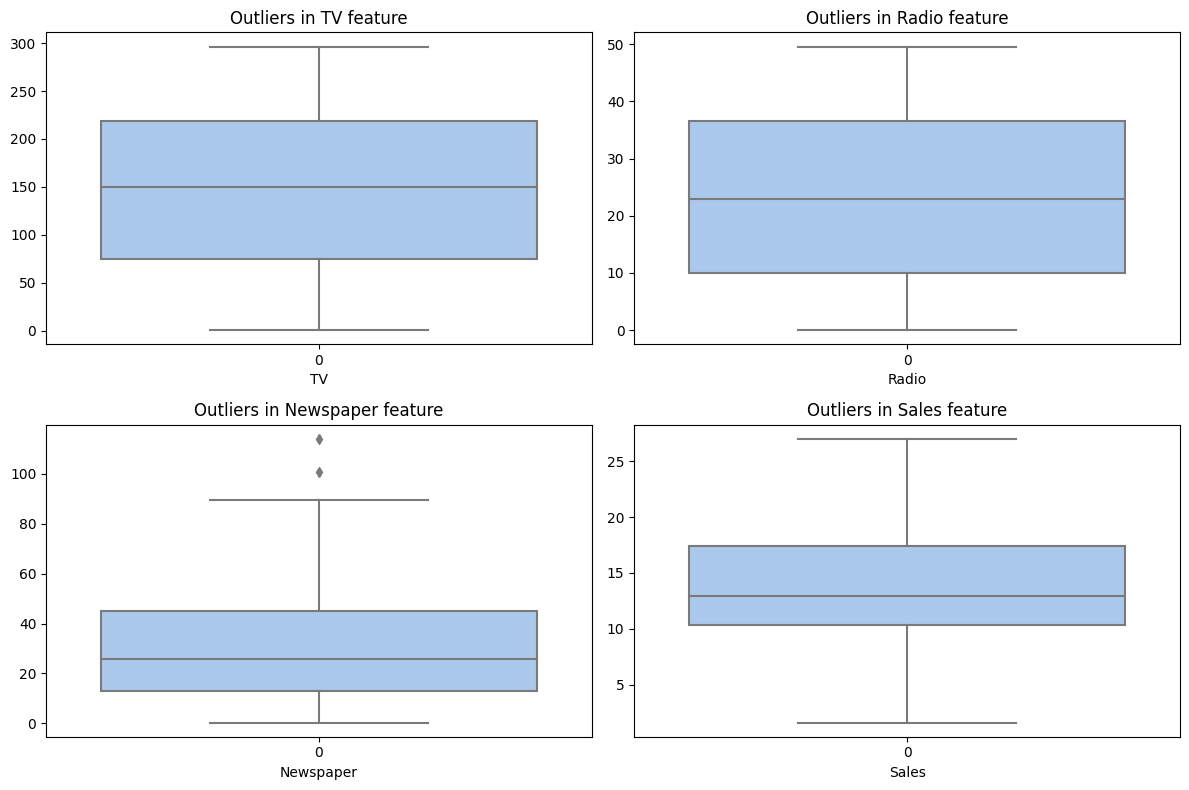

In [10]:
''' Visualize the distribution and summary statistics of continuous variables '''

plt.figure(figsize=(12, 8))
columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}

for plot, col_name in columns.items():
  plt.subplot(2, 2, plot + 1)
  sns.boxplot(data=data[col_name], palette='pastel')
  plt.xlabel(col_name)
  plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()

<u>`Comment :`</u>
The boxplot analysis reveals that the TV, Radio, and Sales columns do not contain any outliers. However, the Newspaper column has two outliers, indicating the presence of unusual or extreme values in that specific variable.

### `Bivariate Analysis`

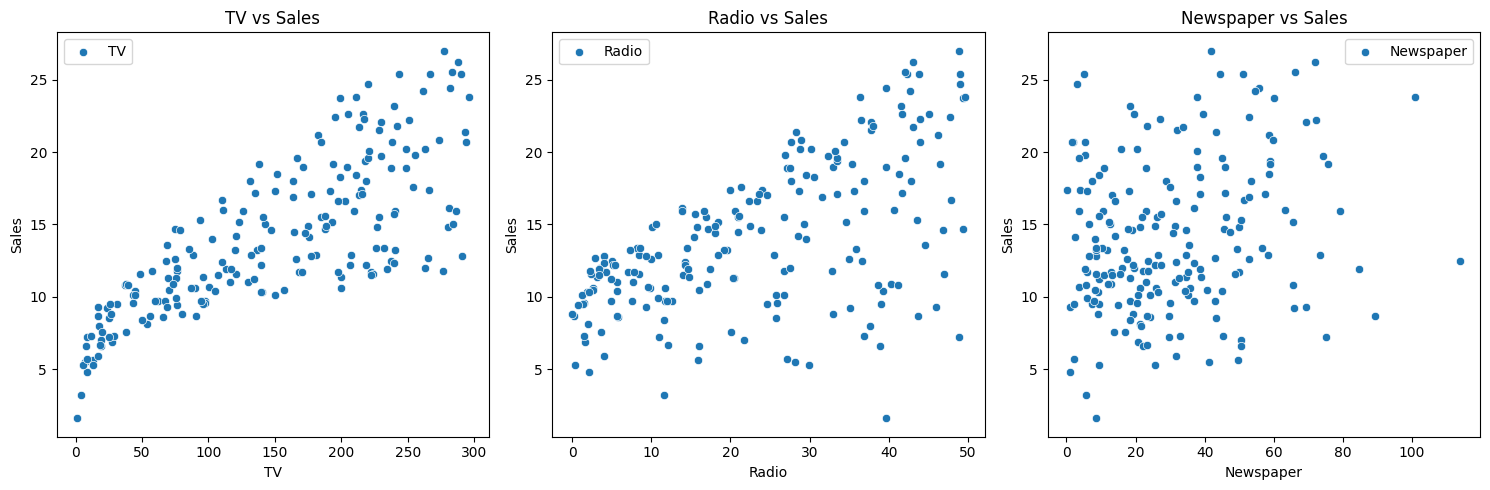

In [11]:
''' Scatter plots to check the linearity assumption between each independent variable
    (TV, Radio, Newspaper) and the dependent variable (Sales) '''

plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.scatterplot(x=data[col_name], y=data["Sales"], label= col_name, palette="pastel")
    plt.xlabel("{}".format(col_name))
    plt.title("{} vs Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()


### `Heatmap`

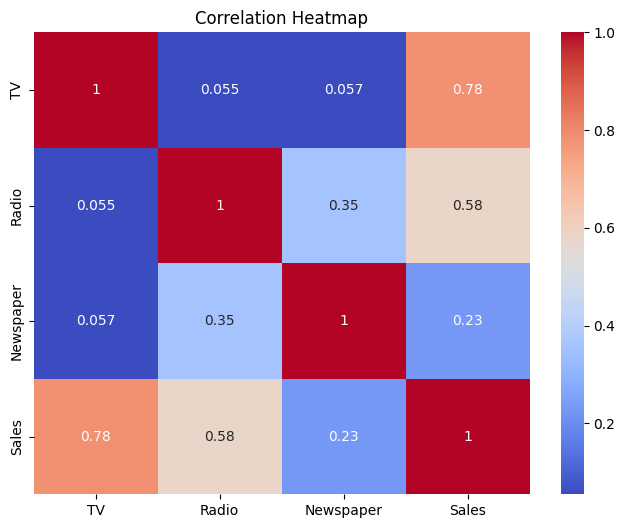

In [12]:
# Correlation Analysis

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<u>`Comment :`</u>
* There is a `strong positive correlation` of approximately `0.782` between the TV advertising budget and sales. TV advertising budget `↗` sales `↗`;

* There is a `moderate positive correlation` of around `0.576` between the radio advertising budget and sales;

* There is a `weak positive correlation` of approximately `0.228` between the newspaper advertising budget and sales.

# `🤖 Training`

Here, we'll use Lazy Predict to train and evaluate a wide range of machine learning regressors.

In [13]:
X, y = shuffle(data.drop(['Sales'], axis=1), data['Sales'], random_state=13)
models, predictions = Lazy(X, y)

100%|██████████| 42/42 [00:01<00:00, 23.48it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 3
[LightGBM] [Info] Start training from score 13.969375
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

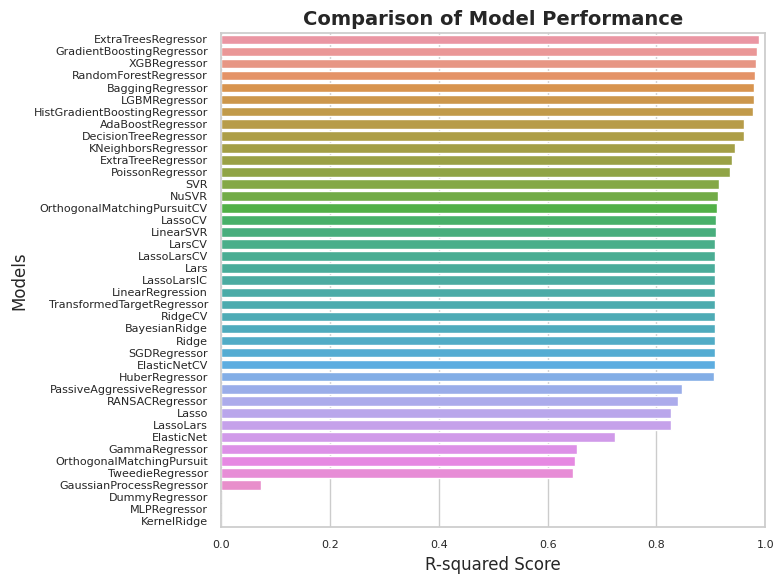

In [14]:
# Set the figure size and style
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

# Create the bar plot
ax = sns.barplot(y=models.index, x="R-Squared", data=models)
ax.set(xlim=(0, 1))

# Set the axis text size
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)

# Set the axis labels and title
ax.set_xlabel('R-squared Score', fontsize=12)
ax.set_ylabel('Models', fontsize=12)
ax.set_title('Comparison of Model Performance', fontsize=14, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

Let's select the top three regressors : ExtraTreesRegressor, GradientBoostingRegressor and XGBRegressor.

In [15]:
# Let's perform dataset splitting again
X_train, X_test, y_train, y_test = train_test_split(data[['TV', 'Radio', 'Newspaper']], data['Sales'], test_size=0.2, random_state=42)

In [16]:
models = [
    ("ExtraTrees Regressor", ExtraTreesRegressor()),
    ("Gradient Boosting Regressor", GradientBoostingRegressor()),
    ("XGB Regressor", XGBRegressor())
]

ExtraTrees Regressor
Mean Squared Error: 0.2875130749999946
R2 Score: 0.99089099051023
Cross-Validation R2: 0.9850397310709296


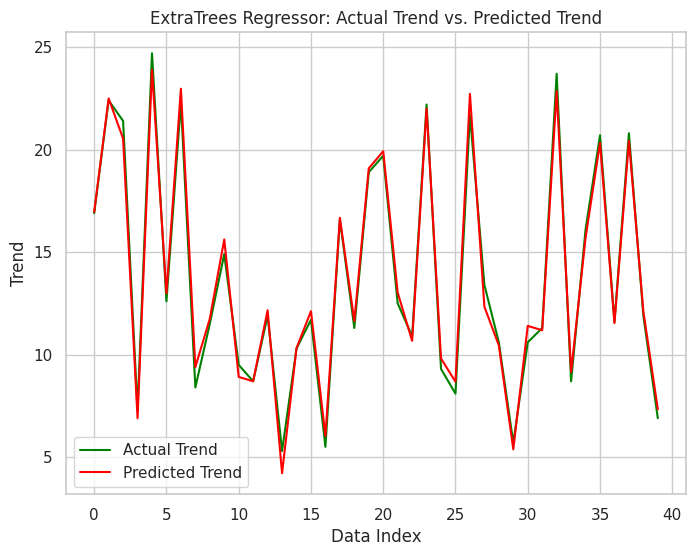


Gradient Boosting Regressor
Mean Squared Error: 0.5064357280159533
R2 Score: 0.9839550676001223
Cross-Validation R2: 0.9695360337074858


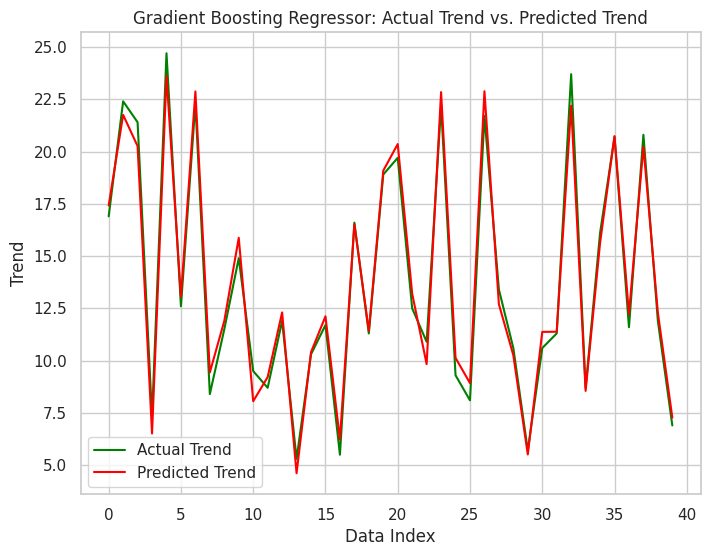


XGB Regressor
Mean Squared Error: 0.8689325216764425
R2 Score: 0.9724704186551494
Cross-Validation R2: 0.9678732874941947


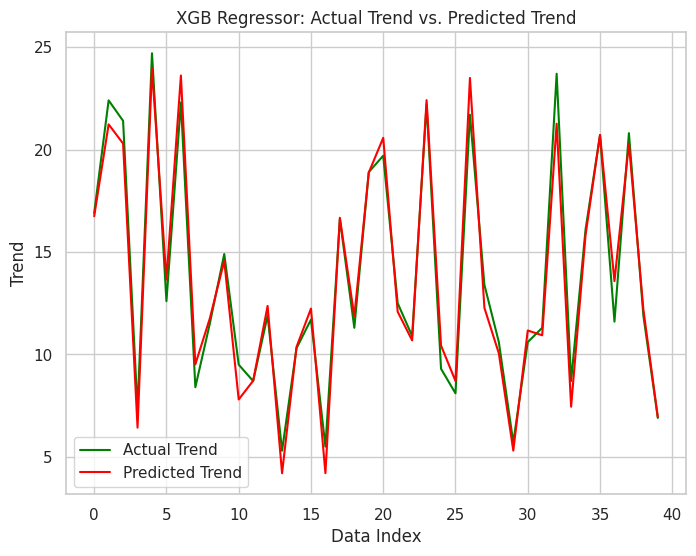

In [17]:
results = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    results.append([name, mse, r2, cv_scores.mean()])

    print("{}".format(name))
    print("Mean Squared Error: {}".format(mse))
    print("R2 Score: {}".format(r2))
    print("Cross-Validation R2: {}".format(cv_scores.mean()))

    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(y_test)), y_test, color='green', label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, color='red', label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()

In [18]:
table = tabulate(results, headers=["Model", "MSE", "R2", "Cross-Validation R2"], floatfmt=".4f", tablefmt="fancy_grid")

print(table)

╒═════════════════════════════╤════════╤════════╤═══════════════════════╕
│ Model                       │    MSE │     R2 │   Cross-Validation R2 │
╞═════════════════════════════╪════════╪════════╪═══════════════════════╡
│ ExtraTrees Regressor        │ 0.2875 │ 0.9909 │                0.9850 │
├─────────────────────────────┼────────┼────────┼───────────────────────┤
│ Gradient Boosting Regressor │ 0.5064 │ 0.9840 │                0.9695 │
├─────────────────────────────┼────────┼────────┼───────────────────────┤
│ XGB Regressor               │ 0.8689 │ 0.9725 │                0.9679 │
╘═════════════════════════════╧════════╧════════╧═══════════════════════╛


* The `lower MSE` value indicate that the model is making relatively accurate predictions. The `high R2` value (close to 1) suggests that the model is explaining a significant portion of the variability in the Sales data, indicating a good fit.

* Based on the provided metrics, the `ExtraTrees Regressor` appears to have the best performance among the three models, followed by the Gradient Boosting Regressor and the XGB Regressor.

# `📝 Model Testing`

In [19]:
extratrees = ExtraTreesRegressor()
extratrees.fit(X_train, y_train)

ExtraTreesRegressor()

In [21]:
tv = float(input("Enter the TV advertising budget: "))
radio = float(input("Enter the Radio advertising budget: "))
newspaper = float(input("Enter the Newspaper advertising budget: "))

new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [newspaper]
})

print("---------------------------------------------")
new_pred = extratrees.predict(new_data)
print("Predicted Sales : {}".format(abs(np.round(new_pred[0], 2))))

Enter the TV advertising budget: 13.4
Enter the Radio advertising budget: 45.09
Enter the Newspaper advertising budget: 20.9
---------------------------------------------
Predicted Sales : 7.32
